In [ ]:
# 파이썬 ≥3.5 필수

import sys

assert sys.version_info >= (3, 5)


# 사이킷런 ≥0.20 필수

import sklearn

assert sklearn.__version__ >= "0.20"


# 공통 모듈 임포트

import numpy as np

import os


# 깔금한 그래프 출력을 위해

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)

mpl.rc('xtick', labelsize=12)

mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project_yong"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension = "png",
             resolution = 300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("그림 저장:", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)

import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")



# 데이터 가져오기


In [ ]:
import os 
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe(
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


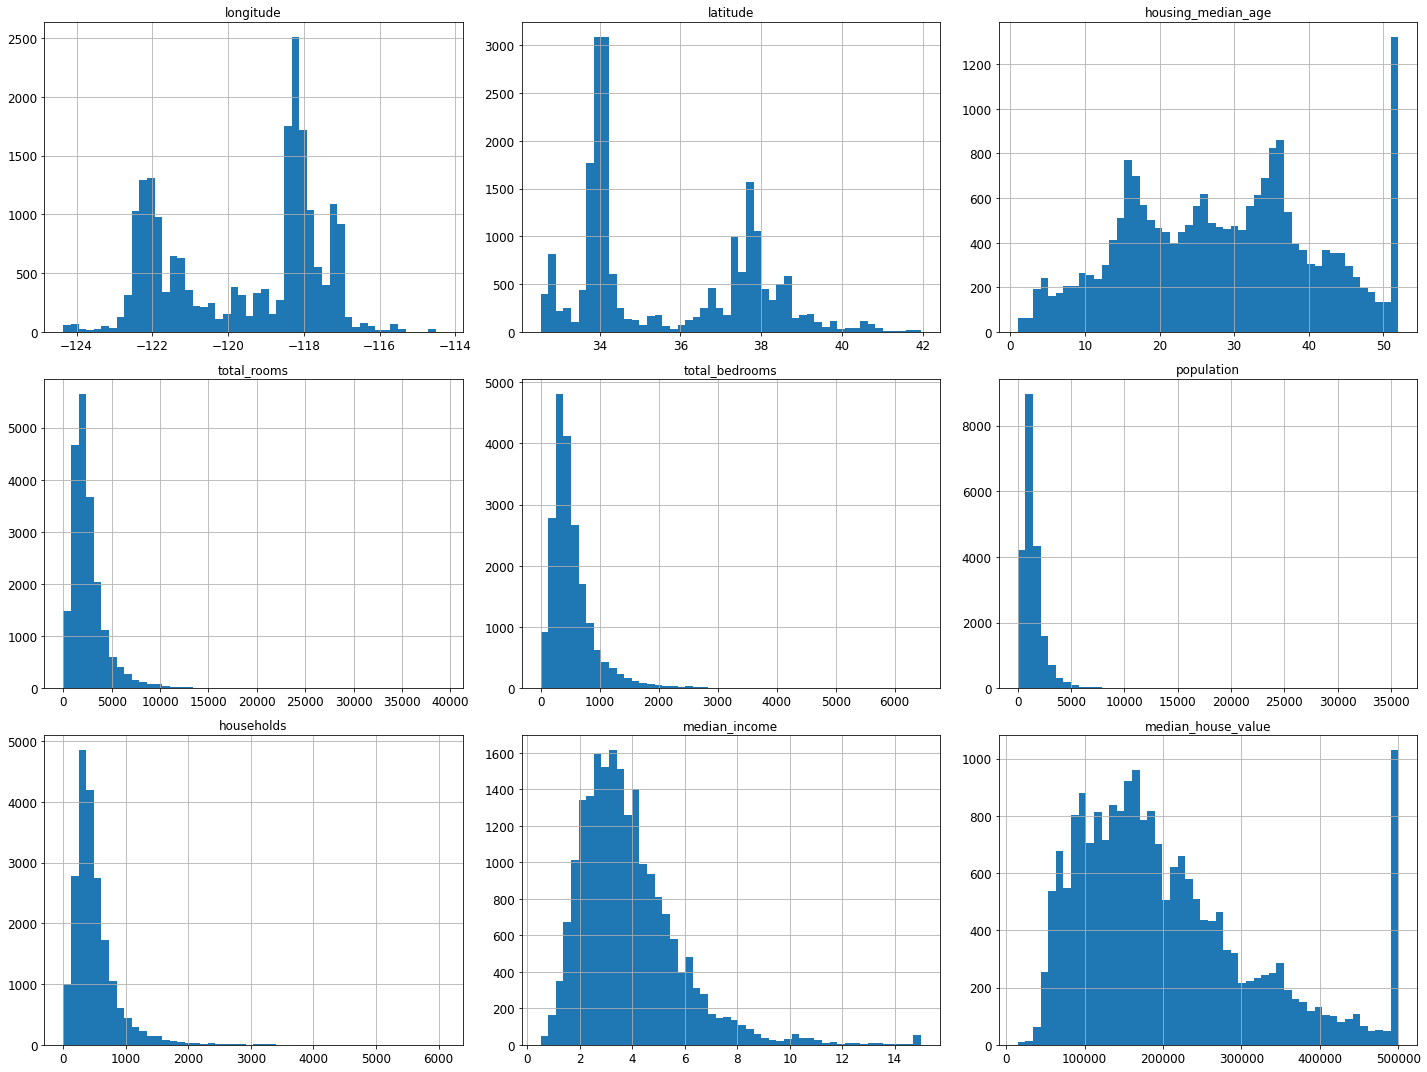

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)

In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

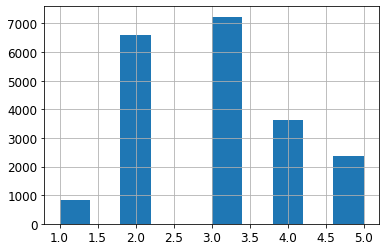

In [ ]:
housing['income_cat'].hist()

In [ ]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                               random_state=43)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
# 원래 상태로 되돌리기
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace = True)

In [ ]:
housing = strat_train_set.copy()

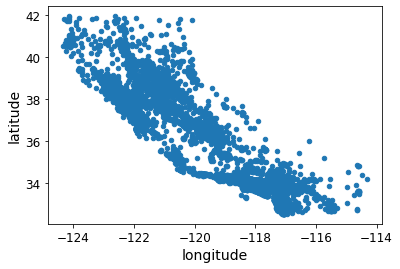

In [ ]:
housing.plot(kind='scatter', x="longitude", y="latitude")

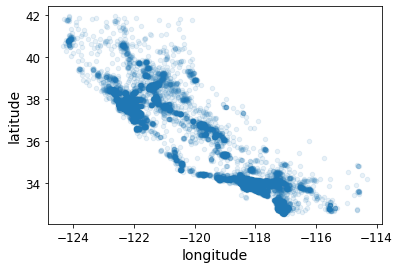

In [ ]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha = 0.1)

그림 저장: housing_prices_scatterplot


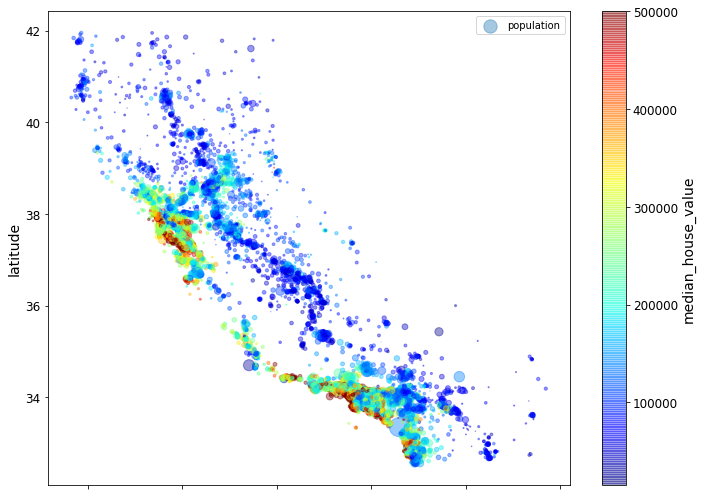

In [ ]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha = 0.4,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap("jet"),
             colorbar=True)
save_fig("housing_prices_scatterplot")

# s -> 원의 반지름
# c -> 색상

# 상관관계

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690551
total_rooms           0.135290
housing_median_age    0.107099
households            0.066341
total_bedrooms        0.050002
population           -0.024069
longitude            -0.040318
latitude             -0.148121
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d4fd2bc88>,
      dtype=object)

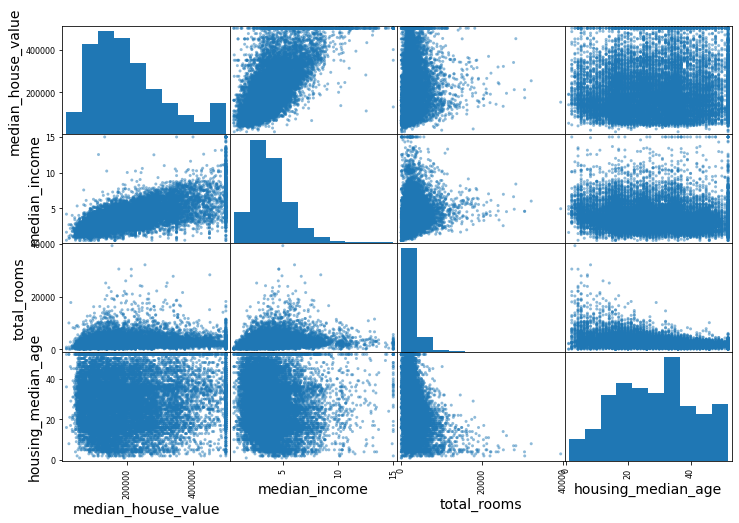

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

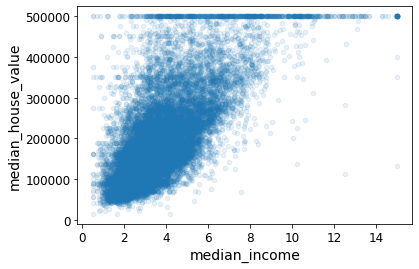

In [ ]:
housing.plot(kind="scatter", x="median_income",
             y="median_house_value",
             alpha=0.1)

# 특성조합
# 파생변수 생성

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690551
rooms_per_household         0.156074
total_rooms                 0.135290
housing_median_age          0.107099
households                  0.066341
total_bedrooms              0.050002
population_per_household   -0.022871
population                 -0.024069
longitude                  -0.040318
latitude                   -0.148121
bedrooms_per_room          -0.257121
Name: median_house_value, dtype: float64

# 타겟 값 분리

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
median

436.0

In [ ]:
# SimpleImputer : 누락된 값을 쉽게 다룰 수 있도록 해줌
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # 여기서는 중간값으로 대체

In [ ]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [ ]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6227,-117.93,34.06,28.0,3342.0,688.0,2210.0,647.0,3.4596
10200,-117.94,33.87,46.0,2066.0,450.0,1275.0,448.0,3.9375
17680,-121.84,37.32,16.0,1866.0,364.0,1835.0,412.0,5.3363
15392,-116.99,33.20,17.0,2980.0,539.0,1531.0,505.0,3.1553
9268,-122.49,38.10,43.0,1226.0,244.0,491.0,205.0,4.9286


In [ ]:
imputer.strategy

'median'

In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [ ]:
housing_cat.head(10)

,ocean_proximity
6227,<1H OCEAN
10200,<1H OCEAN
17680,<1H OCEAN
15392,<1H OCEAN
9268,NEAR BAY
1671,NEAR BAY
2841,INLAND
17041,NEAR OCEAN
8523,<1H OCEAN
8735,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [1.],
       [4.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 사용자 정의 변환기 생성

In [ ]:
# pandas에서 생성하는 것 보단 sklearn 자체에서 통합하는 것이 더 나음

from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator -> 하이퍼파라미터 튜닝 시 사용하는 메소드를 상속함
# TransfomerMixin을 상속해서 유용한 메소드를 사용

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
 housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기                                                       

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # *arg나  *kargs 가 아닙니다.
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # 더 할일이 없음
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                            bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombineAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

# housing_extra_attribs 는 넘파이 배열이라 열 이름이 없음
# 데이터 프레임으로 복원 작업

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
6227,-117.93,34.06,28,3342,688,2210,647,3.4596,<1H OCEAN,5.16538,3.41577
10200,-117.94,33.87,46,2066,450,1275,448,3.9375,<1H OCEAN,4.61161,2.84598
17680,-121.84,37.32,16,1866,364,1835,412,5.3363,<1H OCEAN,4.52913,4.45388
15392,-116.99,33.2,17,2980,539,1531,505,3.1553,<1H OCEAN,5.90099,3.03168
9268,-122.49,38.1,43,1226,244,491,205,4.9286,NEAR BAY,5.98049,2.39512


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
              ('imputer', SimpleImputer(strategy='median')),
              ('attribs_adder', CombineAttributesAdder()),
              ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[ 0.81714319, -0.73386229, -0.04571467, ..., -0.10690357,
         0.0288439 , -0.12119043],
       [ 0.81215014, -0.82282471,  1.38616772, ..., -0.32815018,
        -0.02090041,  0.05762806],
       [-1.13513781,  0.7925456 , -1.00030293, ..., -0.36110353,
         0.11947577, -0.28276142],
       ...,
       [-1.42972752,  0.98451714,  1.86346185, ..., -0.51257464,
         0.08542769, -0.13683814],
       [ 0.68732399, -0.74322676,  0.82932457, ..., -0.77745577,
         0.18784608,  1.29888896],
       [-1.5245954 ,  1.22799324, -0.68210685, ..., -0.26579617,
        -0.08726222,  0.05580927]])

# 숫자형, 범주형 변수 동시에 변환

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ("num", num_pipeline,num_attribs),
  ("cat", OneHotEncoder(), cat_attribs),                              
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 16)

# 모델 선택과 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 훈련 세트에 몇 개의 샘플 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측", lin_reg.predict(some_data_prepared))

예측 [184970.64678445 239340.4344935  246683.7951888  165288.35480714
 284539.6402469 ]


In [ ]:
print("레이블", list(some_labels))

레이블 [202800.0, 187000.0, 212800.0, 250000.0, 307000.0]


# 실제값과 오차가 있는 것을 볼 수 있음

In [ ]:
# MSE 계산
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68116.54761715344

# 중간 주택가격이 120,000 ~ 265.000 사이인데 오차가 68116이면 매우 만족스럽지 못함

In [ ]:
print("레이블", )

array([[ 0.81714319, -0.73386229, -0.04571467,  0.32649834,  0.35949755,
         0.70166082,  0.38765573, -0.21544264, -0.10690357,  0.0288439 ,
        -0.12119043,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.81215014, -0.82282471,  1.38616772, -0.26396766, -0.20928601,
        -0.1344852 , -0.13559268,  0.03667025, -0.32815018, -0.02090041,
         0.05762806,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.13513781,  0.7925456 , -1.00030293, -0.35651719, -0.41481284,
         0.36630814, -0.23025068,  0.77459767, -0.36110353,  0.11947577,
        -0.28276142,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.28648952, -1.13653431, -0.92075391,  0.15898369,  0.00341037,
         0.0944489 ,  0.01428249, -0.37597404,  0.18699297, -0.00468797,
        -0.49525196,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.4596858 ,  1.15775975,  1

In [99]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [102]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [103]:
# 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [104]:
tree_rmse_scores

array([67420.84492334, 68968.10755246, 70007.46340791, 68126.73246588,
       68746.70208735, 69220.29084376, 67079.71953413, 71561.08818527,
       73261.47366441, 71599.49536697])

In [106]:
def display_scores(scores):
  print("점수:", scores)
  print("평균:", scores.mean())
  print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [67420.84492334 68968.10755246 70007.46340791 68126.73246588
 68746.70208735 69220.29084376 67079.71953413 71561.08818527
 73261.47366441 71599.49536697]
평균: 69599.19180314786
표준 편차: 1896.2829436369007


In [107]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,

scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)



점수: [64212.8939011  67341.68004298 67257.98725219 67736.45141673
 73751.84280646 68317.17225103 67370.24975243 66870.4054549
 68647.94962971 73056.49423986]
평균: 68456.31267473861
표준 편차: 2723.2007236067475


# 회귀가 더 좋은 성능을 보임

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18535.67652433048

In [110]:
# 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [112]:
display_scores(forest_rmse_scores)

점수: [48314.07205054 48583.16015857 49444.82602308 50697.95793953
 50364.31366464 48476.80523497 49203.06802205 49065.17419171
 50284.41265786 53524.93157999]
평균: 49795.87215229413
표준 편차: 1472.9680799749533


# 그리드 탐색

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [3,10,30], 'max_features' : [2,4,6,8]},
  {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
   

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [115]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [119]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
                              cvres["params"]):
  print(np.sqrt(-mean_score), params)

63656.94362668527 {'max_features': 2, 'n_estimators': 3}
54712.606956420794 {'max_features': 2, 'n_estimators': 10}
52662.01992388775 {'max_features': 2, 'n_estimators': 30}
60513.85013832535 {'max_features': 4, 'n_estimators': 3}
53317.13523358281 {'max_features': 4, 'n_estimators': 10}
50194.444940585556 {'max_features': 4, 'n_estimators': 30}
58935.27825234137 {'max_features': 6, 'n_estimators': 3}
51975.02229829424 {'max_features': 6, 'n_estimators': 10}
49843.547591546754 {'max_features': 6, 'n_estimators': 30}
59084.57032563665 {'max_features': 8, 'n_estimators': 3}
51661.779698891965 {'max_features': 8, 'n_estimators': 10}
49821.66074591925 {'max_features': 8, 'n_estimators': 30}
62819.42853062427 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54316.27317669129 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60327.34173776267 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52516.72175042887 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [123]:
a=zip(cvres["mean_test_score"],
                              cvres["params"])

a

In [122]:
cvres["mean_test_score"]

array([-4.05220647e+09, -2.99346936e+09, -2.77328834e+09, -3.66192606e+09,
       -2.84271691e+09, -2.51948230e+09, -3.47336702e+09, -2.70140294e+09,
       -2.48437924e+09, -3.49098645e+09, -2.66893948e+09, -2.48219788e+09,
       -3.94628060e+09, -2.95025753e+09, -3.63938816e+09, -2.75800606e+09,
       -3.49789314e+09, -2.58852992e+09])

In [126]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances



array([7.42267474e-02, 6.50412740e-02, 4.39216289e-02, 1.51295406e-02,
       1.44382615e-02, 1.44760052e-02, 1.38334635e-02, 3.72479367e-01,
       4.34667053e-02, 1.05122370e-01, 6.83915055e-02, 6.39072125e-03,
       1.55959105e-01, 1.74997780e-04, 2.43330314e-03, 4.51500389e-03])

In [130]:
extra_attribs = ['rooms_per_hold',"pop_per_hold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3724793669417893, 'median_income'),
 (0.15595910511744085, 'INLAND'),
 (0.10512237001596668, 'pop_per_hold'),
 (0.07422674735626661, 'longitude'),
 (0.068391505512502, 'bedrooms_per_room'),
 (0.065041273982856, 'latitude'),
 (0.04392162885930824, 'housing_median_age'),
 (0.04346670532909168, 'rooms_per_hold'),
 (0.015129540582769498, 'total_rooms'),
 (0.014476005247578784, 'population'),
 (0.01443826150108135, 'total_bedrooms'),
 (0.013833463492527391, 'households'),
 (0.006390721248150156, '<1H OCEAN'),
 (0.004515003893847505, 'NEAR OCEAN'),
 (0.0024333031383699105, 'NEAR BAY'),
 (0.00017499778045407827, 'ISLAND')]

# 모델 test
+ 모델 test

In [131]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [132]:
final_rmse

49246.75127111587

In [135]:
# 신뢰구간 구하기
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([46987.00079016, 51407.26386673])